# Project: Investigate Gun Data in US

## Introduction

Following the implementation of the Brady act in 1994, the Federal Bureau of Investigation (FBI) developed a system to conduct background checks on individuals wanting to obtain a firearm. The system known as the National Instant Criminal Background Check System (NICS) was created in collaboration with the Buereu of Alcohol, Tabacco and Firearms and local law enforcement agencies. Since it's inception in November 1998, the FBI has released monthly data from each state and U.S territory. The FBI claims that over 300 million requests have been aprroved, and 1.5 million have been denied.

### Questions to Investigate:
* How does `permits` changed across years?
* In the gun shooting data, to what extent do the killed vs injured people change? 
* What is the overall trend of gun purchases?
* Which states have the highest growth in gun registrations?

In [1]:
# Imports
import pandas as pd
import numpy as np
import helpers as hp
import sweetviz as sv
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Data Wrangling
* I have surfed the internet for associated data that can help dig deeper in the provided data to extract insightful analysis. The data found was `Gun violence database` that is found here: https://www.kaggle.com/gunviolencearchive/gun-violence-database?select=mass_shootings_all.csv

In [2]:
# Reading the dataset
df_gun = pd.read_csv("gun_data.csv")
df_violence = pd.read_csv("mass_shootings_all.csv")

In [3]:
# Exploring data types of the dfs
df_gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [4]:
# Exploring data types of the dfs
df_violence.dtypes

Incident Date      object
State              object
City Or County     object
Address            object
# Killed            int64
# Injured           int64
Operations        float64
dtype: object

## Data Cleaning
* Cleaning columns names only for `df_violence`
* Data types Conversion: `df_gun['month', 'multiple', 'totals']` and `df_violence['Incident Date']` to their correct dtypes.
* Dealing with missing values

In [5]:
# First: clean `df_violence`
df_violence.columns = df_violence.columns.to_series().apply(lambda x: x.strip('# ').lower().replace(' ', '_'))
df_violence.columns.tolist()

['incident_date',
 'state',
 'city_or_county',
 'address',
 'killed',
 'injured',
 'operations']

#### Data types conversion
As shown above, there are three columns that needs data type conversion in order to do some analysis specially for the `month` and `Incident Date` column for time serires analysis. The next cell will do this conversion.

In [6]:
# Converting data types
# I made a dictionary in the `astype()` function so that you can add as many as columns needed conversions.
df_gun = df_gun.astype({'month':'datetime64[ns]'})
df_violence = df_violence.astype({'incident_date':'datetime64[ns]'})

In [7]:
# Making sure of conversion for df_gun
df_gun.dtypes

month                        datetime64[ns]
state                                object
permit                              float64
permit_recheck                      float64
handgun                             float64
long_gun                            float64
other                               float64
multiple                              int64
admin                               float64
prepawn_handgun                     float64
prepawn_long_gun                    float64
prepawn_other                       float64
redemption_handgun                  float64
redemption_long_gun                 float64
redemption_other                    float64
returned_handgun                    float64
returned_long_gun                   float64
returned_other                      float64
rentals_handgun                     float64
rentals_long_gun                    float64
private_sale_handgun                float64
private_sale_long_gun               float64
private_sale_other              

In [8]:
# Making sure of conversion for df_violence
df_violence.dtypes

incident_date     datetime64[ns]
state                     object
city_or_county            object
address                   object
killed                     int64
injured                    int64
operations               float64
dtype: object

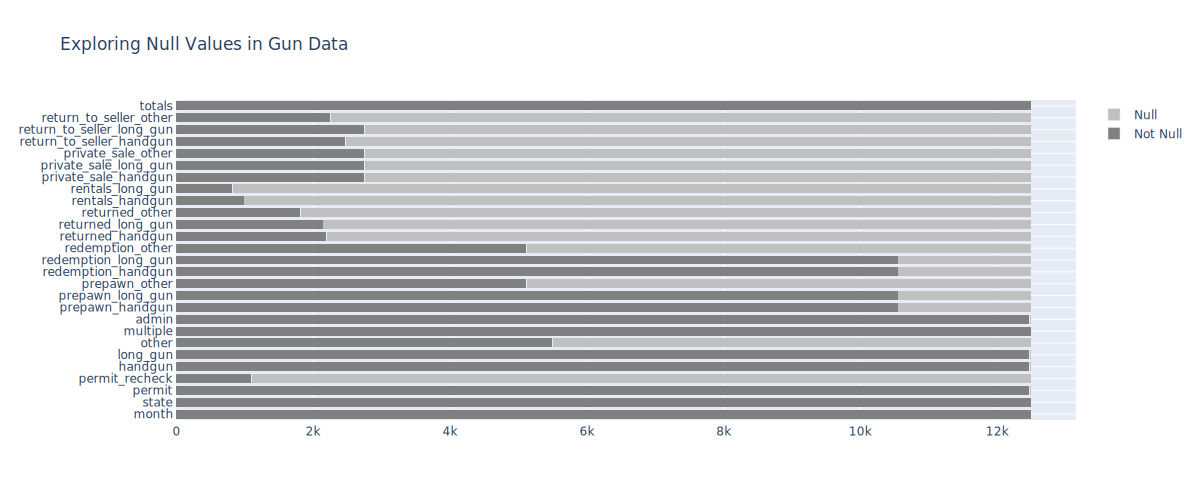

In [9]:
hp.explore_nans(df_gun, 'Exploring Null Values in Gun Data')

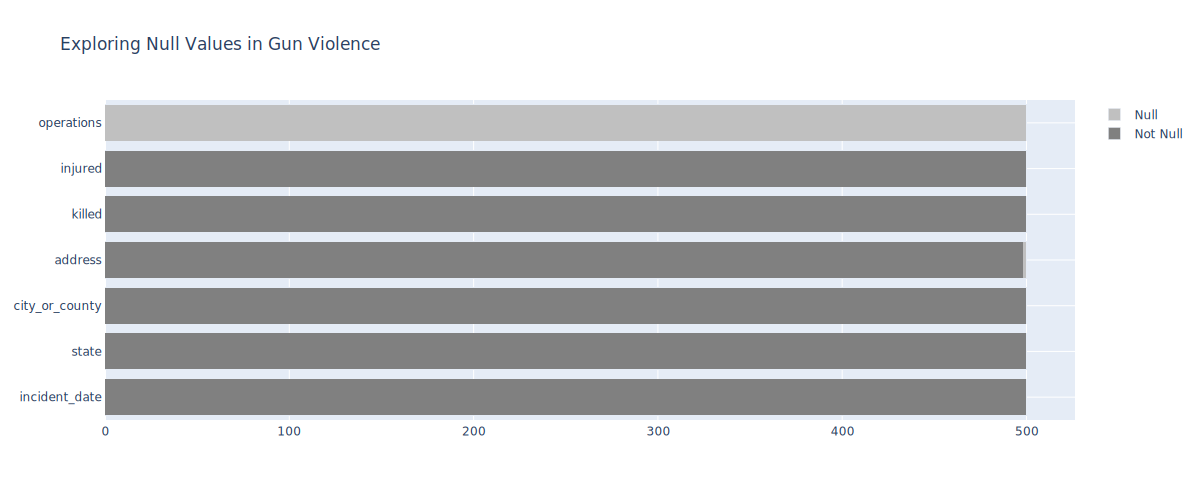

In [10]:
hp.explore_nans(df_violence, 'Exploring Null Values in Gun Violence')

#### Dealing with missing values
As shown in the above chart, there arey many columns we need to take a decision ahead. The next will handle missing values through two steps. First to drop columns that have 60% or more of missing data so that no appropriate statistical operation can be done on. Second, filling other missing data with the mode value of each column assueming that they will take the same most frequent values. I will not be using mean due to outliers which will affect the distribution of the data.

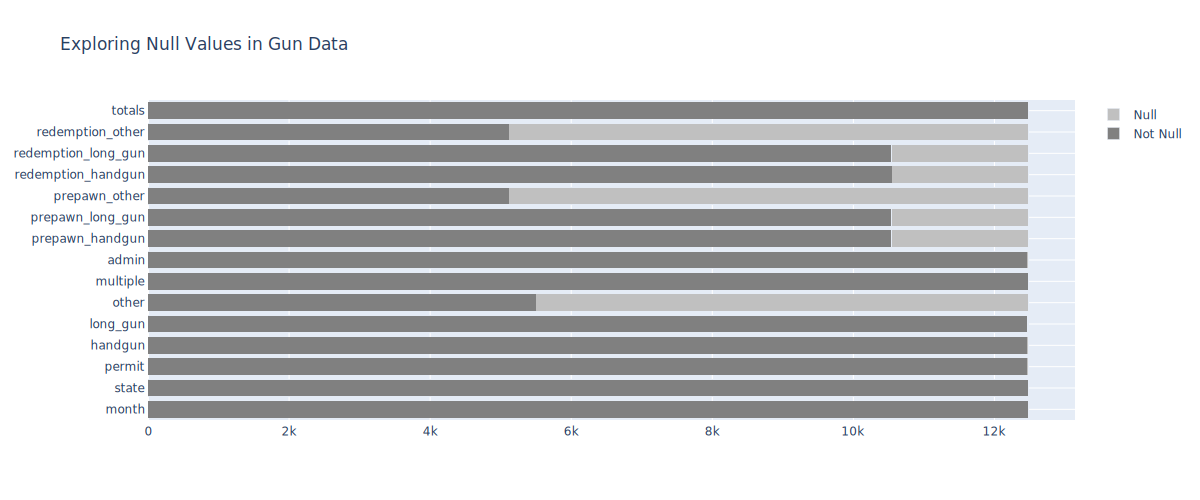

In [11]:
# task 1: dropping columns that have 60% or more of missing data
df_gun_v1 = hp.drop_60_missings(df_gun)
# recheck NaNs
hp.explore_nans(df_gun_v1, 'Exploring Null Values in Gun Data')

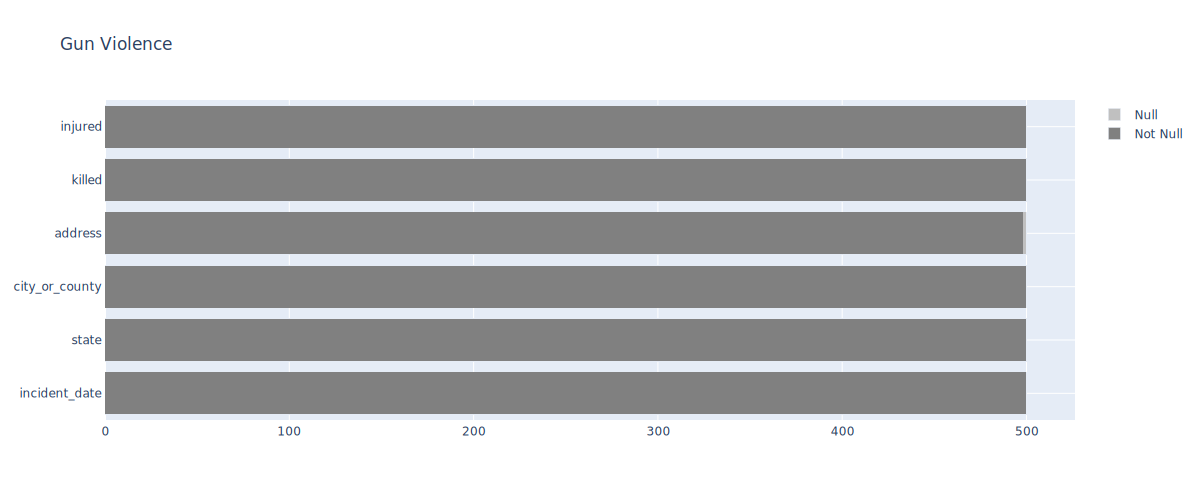

In [12]:
# task 1: dropping columns that have 60% or more of missing data
df_violence_v1 = hp.drop_60_missings(df_violence)
# `address` column has two missing values. No action needed to take against as the only suitable one is `fillna('ffill')`
# which is suitable in execution but not vaild for data so that it misleads gun shoot incident address
# recheck NaNs
hp.explore_nans(df_violence_v1, 'Gun Violence')

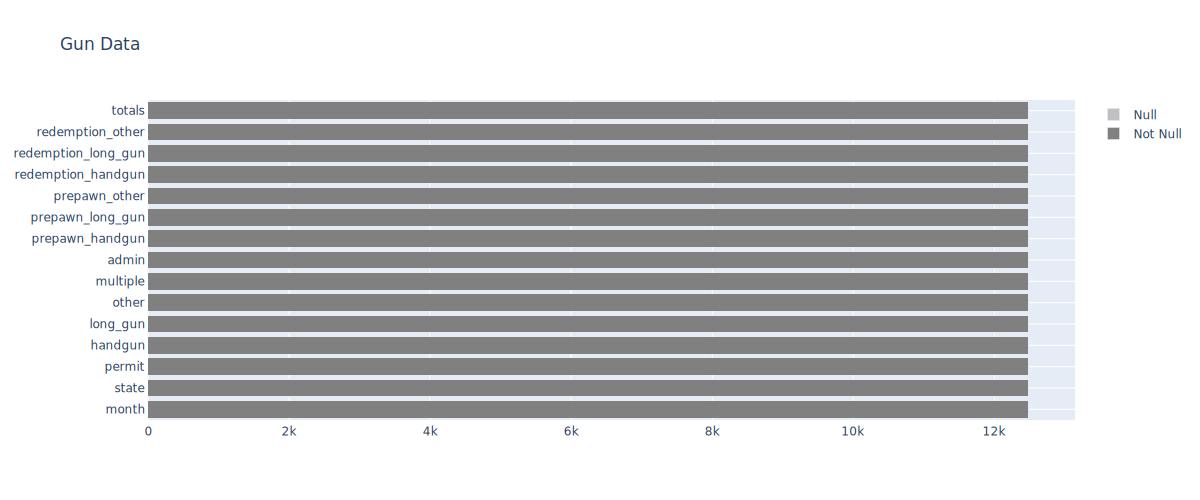

In [13]:
# task 2: filling remaining columns with missing values with columns mode
df_gun_v1 = df_gun_v1.apply(lambda x: x.fillna(x.mode().index[0]) if x.dtypes == np.number else x)

# another way to do the same task:
# for col in df1.select_dtypes(include=np.number):
#     df1[col] = df1[col].fillna(df1[col].mode().index[0])

# recheck NaNs
hp.explore_nans(df_gun_v1, 'Gun Data')

## Exploratory Data Analysis

#### SweetViz Vizuals

In this case, I tend to use SweetViz, a Python graphing library, to perform quick exploration on both datasets after they have been cleaned. The HTML files have been embeded in the Jupyter homespace and will be displayed here.

In [14]:
# sv.analyze(df_gun_v1).show_html('df_gun.html')
# sv.analyze(df_violence_v1).show_html('df_violence.html')

### df_gun exploration

In [15]:
df_gun_v1.describe()

,permit,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,totals
count,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000
mean,6401.300441,5931.364277,7798.960833,158.798078,268.603364,58.789588,4.076652,6.613696,0.067841,344.577333,506.156268,0.743692,21595.725911
std,23731.158830,8614.954626,9307.740581,913.339655,783.185073,604.262697,10.174706,15.395329,0.681467,735.036825,901.549269,3.061003,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,857.000000,2063.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,511.000000,3046.000000,5114.000000,0.000000,125.000000,0.000000,0.000000,0.000000,0.000000,2.000000,83.000000,0.000000,12399.000000
75%,4257.000000,7277.000000,10374.000000,89.000000,301.000000,0.000000,3.000000,6.000000,0.000000,421.000000,670.000000,0.000000,25453.000000
max,522188.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,10046.000000,8831.000000,79.000000,541978.000000


### df_violence exploration

In [16]:
# Exploring numeric values through `describe()`
df_violence_v1.describe()

,killed,injured
count,500.000000,500.00000
mean,1.162000,4.05800
std,2.708214,3.08702
min,0.000000,0.00000
25%,0.000000,3.00000
50%,1.000000,4.00000
75%,1.000000,5.00000
max,50.000000,53.00000


In [17]:
# Exploring numeric values through `describe()`
df_violence_v1.describe(include='O')

,state,city_or_county,address
count,500,500,498
unique,41,253,498
top,Illinois,Chicago,South Grand and Montana
freq,54,37,1


### Q.1 How does `permits` changed across years?

In [18]:
per = df_gun_v1['month'].dt.to_period('y')
groupped = df_gun_v1.groupby([per])['permit'].sum()

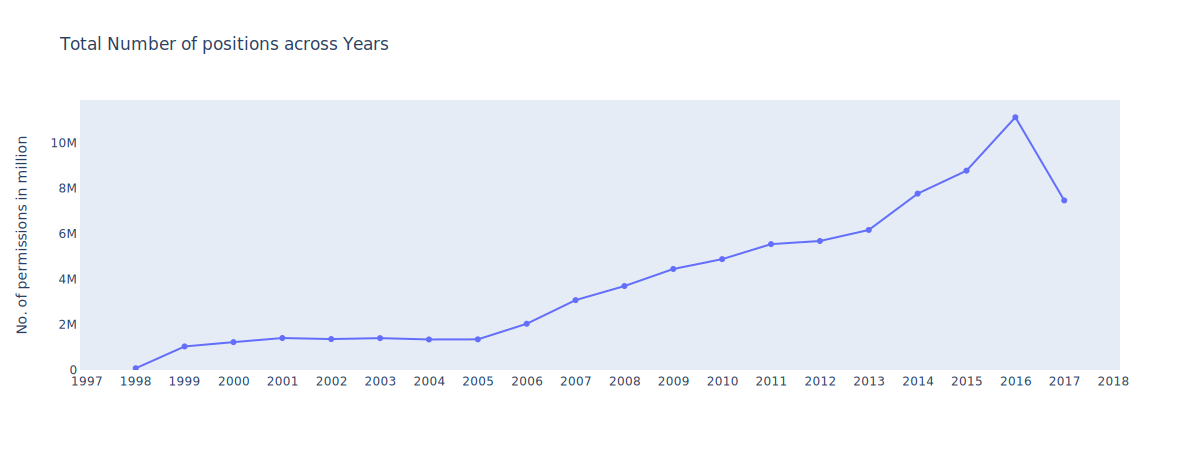

In [19]:
fig = go.Figure(
    go.Scatter(
        x=groupped.index.astype(str).tolist(), y=groupped.values.tolist(),
        mode="lines+markers",
        hovertext=["Period: " + str(i) for i in groupped.index]
    ),
    go.Layout(
        title="Total Number of positions across Years",
        xaxis={"showgrid":False, "dtick":1},
        yaxis={"showgrid":False, "rangemode":"tozero", "title":"No. of permissions in million"}
    )
)
fig.show(renderer='svg', width=1200)

### Q2.In the gun shooting data, to what extent has the number of killed vs injured people changed?

In [20]:
# Creating new columns and change format for a column in `df_gun_v1` and `df_violence_v1`
# These three conversions will be using later
df_gun_v1['year'] = df_gun_v1['month'].dt.to_period('y').astype(str)
df_gun_v1['month'] = df_gun_v1['month'].dt.to_period('m')
df_violence['month'] = df_violence['incident_date'].dt.to_period('m')
# creating `year` column holding the year value from `incident_date` in order to filter the data.
df_violence_v1['year'] = df_violence_v1['incident_date'].dt.to_period('y').astype(str)

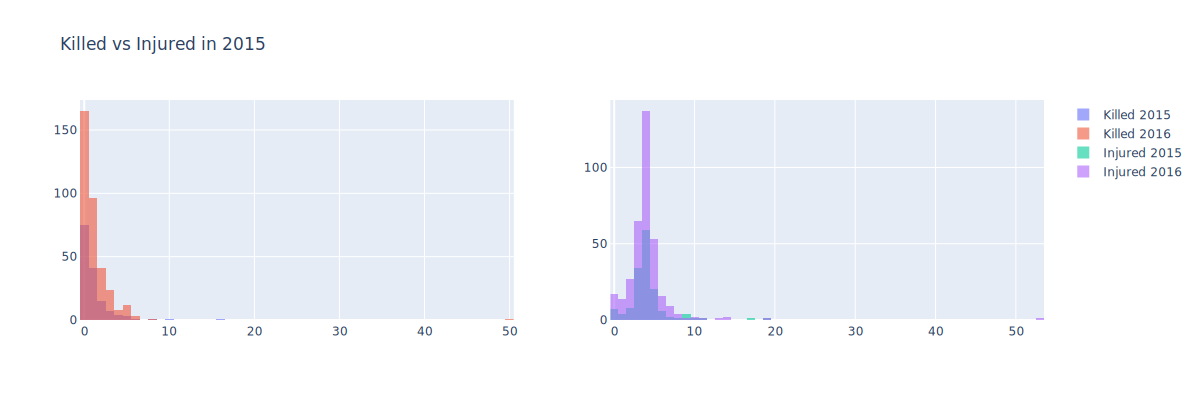

In [21]:
df_2015 = df_violence_v1.query('year == "2015"')
df_2016 = df_violence_v1.query('year == "2016"')
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Histogram(name='Killed 2015', x=df_2015['killed'].astype(str).tolist()), row=1, col=1)
fig.add_trace(go.Histogram(name='Killed 2016', x=df_2016['killed'].astype(str).tolist()), row=1, col=1)
fig.add_trace(go.Histogram(name='Injured 2015',x=df_2015['injured'].astype(str).tolist()), row=1, col=2)
fig.add_trace(go.Histogram(name='Injured 2016',x=df_2016['injured'].astype(str).tolist()), row=1, col=2)
fig.update_layout(title_text="Killed vs Injured in 2015", barmode='overlay')
fig.update_traces(opacity=0.60)
fig.show(renderer='svg', height=400, width=1200)

### Q.3 What is the overall trend of gun purchases?

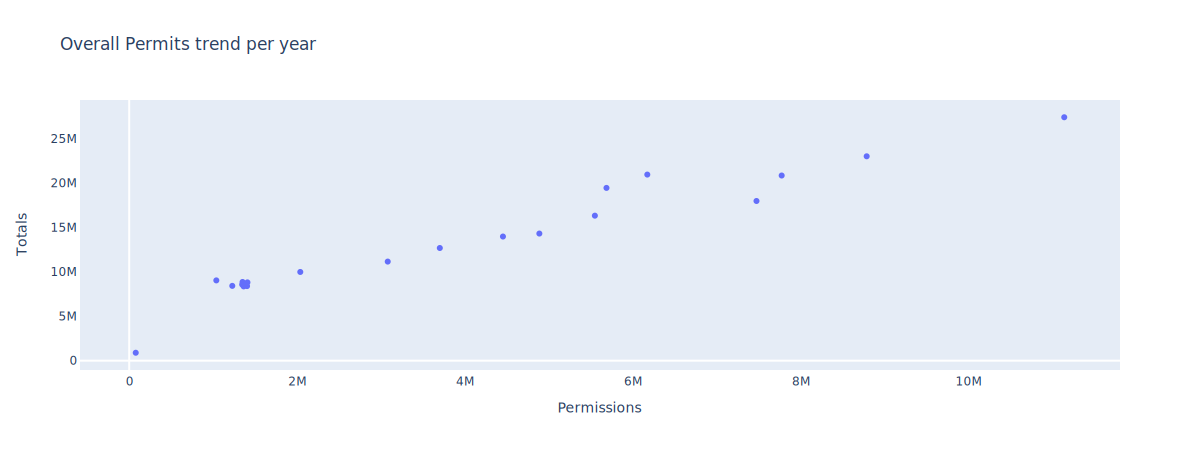

In [22]:
permit = df_gun_v1.groupby('year')['permit', 'totals'].sum().reset_index()
data = go.Scatter(
    x=permit['permit'].tolist(),
    y=permit['totals'].tolist(),
    mode='markers'
)
layout = go.Layout(
    title='Overall Permits trend per year',
    xaxis={'showgrid':False, 'title':'Permissions'},
    yaxis={'showgrid':False, 'title':'Totals'}
)
fig = go.Figure(data, layout)
fig.show(renderer='svg', width=1200)

In [23]:
# useing the `cov` numpy function to help determining whether the two variables are correlated or not
print("Covariance: (Positive Correlation)\n{}".format(np.cov(permit['permit'].tolist(), permit['totals'].tolist())))

Covariance: (Positive Correlation)
[[9.58150825e+12 1.94753258e+13]
 [1.94753258e+13 4.22186690e+13]]


### Q.4 What is the overall trend of gun purchases?

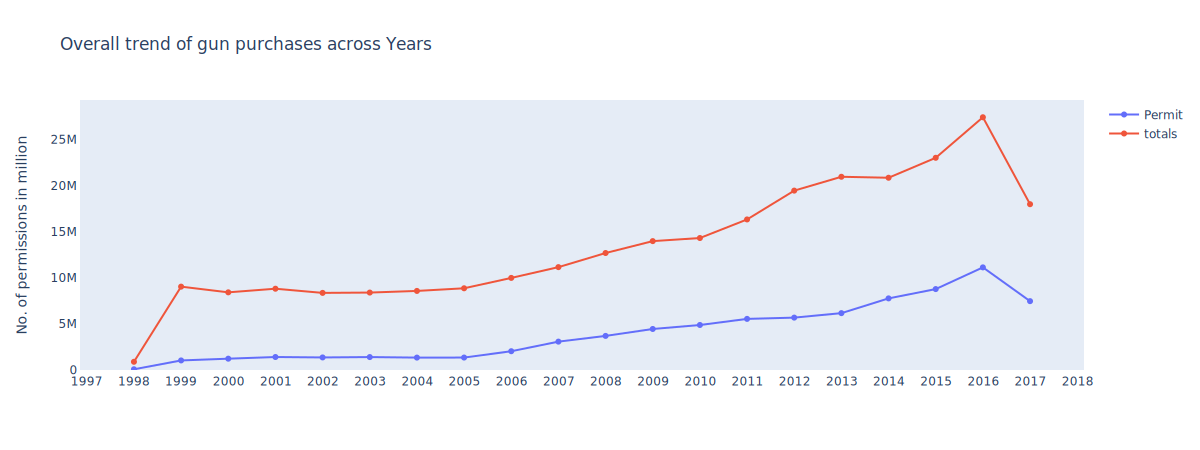

In [24]:
permit = df_gun_v1.groupby('year')['permit'].sum()
totals = df_gun_v1.groupby('year')['totals'].sum()
x = permit.index.tolist()
data = [
    go.Scatter(
        name='Permit',
        x=x,
        y=permit.values.tolist(),
        mode="lines+markers"
    ),
    go.Scatter(
        name='totals',
        x=x,
        y=totals.values.tolist(),
        mode="lines+markers"
    )
]
layout = go.Layout(
        title="Overall trend of gun purchases across Years",
        xaxis={"showgrid":False, "dtick":1},
        yaxis={"showgrid":False, "rangemode":"tozero", "title":"No. of permissions in million"},
        width=1200
)
fig = go.Figure(data, layout)
fig.show(renderer='svg', width=1200)

### Q5. Is there a relation between the number if killed and injured people vs the number of  permissions?

Answering this question will require merging between the two dataframes used before. First a `year` column created to filter the `df_gun` based on only 2015 and 2016 as those are the existing years availble in `df_violence`. The merge will be on the `state` column so that we have consistent dataframe to finally answer this question.

In [25]:
# Filtering the data
df_gun_1516 = df_gun_v1.query("year == '2016'| year == '2015'")

The merging operation itself also has a bit kind of logic; the `state` length is `df_violence` is 41 while in `df_gun_1516` is 55, so I decided to merge `df_gun_1516` on `df_violence` in order to only take the mutual states and left those which are not in `df_violence`.

In [26]:
# Merging both dataframe
merged_dfs = pd.merge(df_violence_v1, df_gun_1516, on='state', how='left', suffixes=('_shooting', '_gun'))

In [27]:
# Some columns will be deleted due to no use in my case study
columns_to_drop = ['city_or_county', 'address', 'year_gun', 'other']
merged_dfs.drop(columns=columns_to_drop, inplace=True)

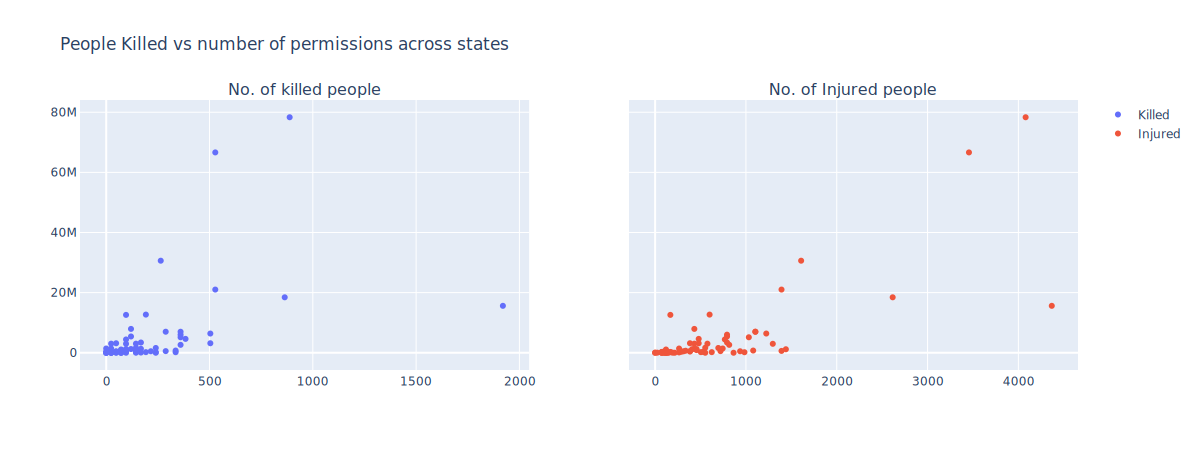

In [28]:
# Ansering the question: Is there a relation between no. of killed vs no. of permissions?
killed_permit = merged_dfs.groupby(['state','year_shooting'])['killed', 'permit'].sum().reset_index()
injured_permit = merged_dfs.groupby(['state','year_shooting'])['injured', 'permit'].sum().reset_index()
fig = make_subplots(rows=1, cols=2, subplot_titles=['No. of killed people', 'No. of Injured people'], shared_xaxes=True, shared_yaxes=True)
fig.add_trace(
    go.Scatter(
        name = 'Killed',
        x=killed_permit['killed'].tolist(),
        y=killed_permit['permit'].tolist(),
        mode='markers'
    ), row=1, col=1
)
fig.add_trace(
    go.Scatter(
        name= 'Injured',
        x=injured_permit['injured'].tolist(),
        y=injured_permit['permit'].tolist(),
        mode='markers'
    ), row=1, col=2
)
fig.update_layout(
    title='People Killed vs number of permissions across states')
fig.show(renderer='svg', width=1200)

Beside vizualizing this relationship, I'm using the `np.covariance()` numpy function to determine the relationship numerically.

In [29]:
print("Covariance: (Positive Correlation)\n{}".format(np.cov(killed_permit['killed'].tolist(), killed_permit['permit'].tolist())))

Covariance: (Positive Correlation)
[[7.65966423e+04 1.80694867e+09]
 [1.80694867e+09 1.64786864e+14]]


In [30]:
print("Covariance: (Positive Correlation)\n{}".format(np.cov(injured_permit['injured'].tolist(), injured_permit['permit'].tolist())))

Covariance: (Positive Correlation)
[[7.11683580e+05 8.36660828e+09]
 [8.36660828e+09 1.64786864e+14]]


## Conclusions
**Q1**- As shown in this graph, there an increasing trend in the number of permissions across years from 1998 till 2017. It was regular increase from 1998 to 2005 then it takes a more quick growing trend scince 2006 till reaching 2016, a year that shows a sudden peak in number of permission for guns which, of course, refers to high demand in purchase for different kinds of guns. 

**Q2**- The graphs of question 2 are telling us that the distribution of killed vs injured people has changed significantly. In 2015, the number of people killed ranging from 1 to 2 or three was the most frequent reachin to around 110 times a person to three persons have been killed while the injured has a richer distribution and freqency leading us to see how much the number of injured peacked reaching to 5 at their top freqency. This is all unlike what happened in 2016 that may refer to more security procedures were taken either to protect people or prevent commiting a crime. I know there's wider variance in frequncy but in the same time a less number of killed and injured people are recorded which is I see as a sign of success.  

**Q3**- The third graph tells us that there is a positive correlation between the number of permissions and the totals. The relationship shows a growing trend across months from 1998 till 2017 that each time the number of permissions increase, the number of totals increases too!

**Q4**- From the Line chart of gun sales vs years 1997 - 2016, there is increasing trend of gun purchases with sudden increases in year 2015 and 1998 and decrease in year 2016 which is partially due to data collection of only 9 months in that year.

**Q5**- From the two scatters in the last question, we can determine a positive correlation between the number of permissions vs the number of killed and injured people across states. Positively correlated means that the more number of permissions to hold guns, the more number of people are injured and killed.

## Limitations
* Missing or nan values in the dataset which could affect our understanding of the long term insights of particular variable.
* Presence of outliers in the dataset adversely affects strength of other data values in calculations.
* Non-standardisation of the datasets

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0